## imports

In [1]:
import os, time
from glob import glob
import numpy as np

from model.VariationalAutoencoder import VariationalAutoencoder
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


# VAE

## model variables

In [2]:
DATETIME = time.strftime("%Y%m%d-%H%M%S")

LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000

cloud_training = False

if cloud_training :
    BATCH_SIZE = 35
    EPOCHS = 100
    DATA_FOLDER = '/data/train'
    RUN_FOLDER = '/data/run/'
else:
    BATCH_SIZE = 5
    EPOCHS = 1
    DATA_FOLDER = '/Volumes/My Passport/PFM/fastcheck'
    RUN_FOLDER =  '/Volumes/My Passport/PFM/run/'
    
run_id = '0001'
data_name = 'cells'
RUN_FOLDER += '_'.join([run_id, data_name, DATETIME])

INPUT_DIM = (128,128,3)

## training setup

In [3]:
t = VariationalAutoencoder(image_folder=DATA_FOLDER, run_folder=RUN_FOLDER, train_mode=True, use_dropout=False, z_dim=400)

t.compile(learning_rate=LEARNING_RATE, r_loss_factor=R_LOSS_FACTOR)

t.encoder.summary()
t.decoder.summary()    

filenames = np.array(glob(os.path.join(DATA_FOLDER, '*/*.png')))

NUM_IMAGES = len(filenames)

print('Total images: ' + str(NUM_IMAGES))

steps_per_epoch = NUM_IMAGES / BATCH_SIZE
data_gen = ImageDataGenerator(rescale=1./255) # 8 BITS X CHANNEL
data_flow = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = INPUT_DIM[:2]
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 64, 64, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 32)   128         encoder_conv_1[0][0]             
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## train

Epoch 1/1


1/4 [======>.......................] - ETA: 6s - loss: 1252.7450 - vae_r_loss: 853.4535 - vae_kl_loss: 399.2915

2/4 [=============>................] - ETA: 2s - loss: 1331.2708 - vae_r_loss: 791.1244 - vae_kl_loss: 540.1464

3/4 [====================>.........] - ETA: 1s - loss: 1193.3390 - vae_r_loss: 778.1280 - vae_kl_loss: 515.5250

4/4 [===========================>..] - ETA: 0s - loss: 1141.6643 - vae_r_loss: 715.6781 - vae_kl_loss: 482.0334

5/4 [===================================] - 4s 747ms/step - loss: 1091.3785 - vae_r_loss: 665.6429 - vae_kl_loss: 452.4898



Epoch 00001: saving model to /Volumes/My Passport/PFM/run/0001_cells_20200504-183620/weights/weights-001-1118.13.h5



Epoch 00001: saving model to /Volumes/My Passport/PFM/run/0001_cells_20200504-183620/weights/weights.h5


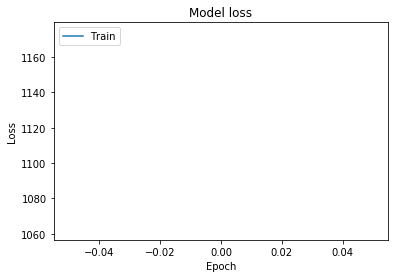

In [4]:
#t.train_with_generator(data_flow = data_flow, epochs = EPOCHS, steps_per_epoch = NUM_IMAGES / BATCH_SIZE, run_folder = RUN_FOLDER, print_every_n_batches = 10)
t.train(, epochs = EPOCHS, steps_per_epoch = NUM_IMAGES / BATCH_SIZE, run_folder = RUN_FOLDER, print_every_n_batches = 10)